In [64]:
import numpy as np
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf

In [65]:
data_dir = 'flowers/'
labels = ['daisy','dandelion','rose','sunflower','tulip']
x = []
y = []
for label in labels:
    data = os.path.join(data_dir,label)
    print(f"The currrent path is: {data} \n")
    for image in os.listdir(data):
        try:
            im = cv2.imread(os.path.join(data,image),cv2.IMREAD_COLOR)
            im = cv2.resize(im,(128,128))            
            x.append(im)
            y.append(labels.index(label))
            
            
        except Exception as e:
            pass

The currrent path is: flowers/daisy 

The currrent path is: flowers/dandelion 

The currrent path is: flowers/rose 

The currrent path is: flowers/sunflower 

The currrent path is: flowers/tulip 



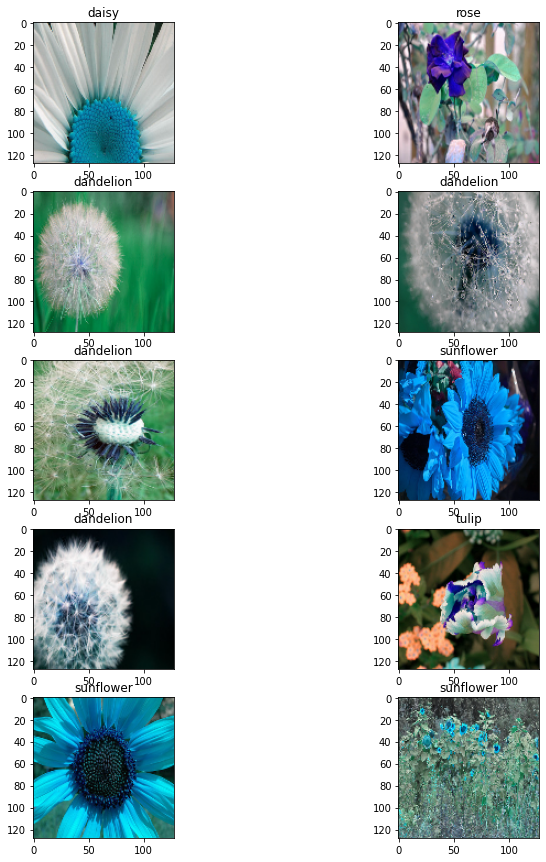

In [68]:
import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12,15)
for i in range(5):
    for j in range(2):
        ran =random.randint(0,len(x))
        ax[i, j].imshow(x[ran])
        ax[i, j].set_title(labels[y[ran]])

In [69]:
x = np.array(x)/255.0
y = np.array(y)
x =x.reshape(-1,128,128,3)
y= y.reshape(-1,1)
y= tf.keras.utils.to_categorical(y,5,)

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(
fill_mode= 'nearest',
horizontal_flip=True,
vertical_flip=True,
shear_range=0.1,
zoom_range = 0.1, # Randomly zoom image 
width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
height_shift_range=0.2
)

datagenerator.fit(x)

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [78]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(64,(5,5),padding ='same',strides=(2,2),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(5,5),padding ='same',strides=(2,2),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(5,5),padding ='same',strides=(2,2),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(5,5),padding ='same',strides=(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5,activation='softmax'))

In [79]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)

In [82]:
history = model.fit(datagenerator.flow(x_train,y_train,batch_size=64),epochs=20,
                    callbacks=[earlystop],validation_data=datagenerator.flow(x_test,y_test))


Epoch 1/20
55/55 [==============================] - 33s 593ms/step - loss: 1.5786 - accuracy: 0.2426 - val_loss: 1.9747 - val_accuracy: 0.3029
Epoch 2/20
55/55 [==============================] - 36s 648ms/step - loss: 1.3644 - accuracy: 0.3635 - val_loss: 0.5746 - val_accuracy: 0.4647
Epoch 3/20
55/55 [==============================] - 43s 778ms/step - loss: 1.2489 - accuracy: 0.4679 - val_loss: 0.9783 - val_accuracy: 0.4590
Epoch 4/20
55/55 [==============================] - 41s 744ms/step - loss: 1.1877 - accuracy: 0.5067 - val_loss: 0.5005 - val_accuracy: 0.5075
Epoch 5/20
55/55 [==============================] - 42s 764ms/step - loss: 1.1181 - accuracy: 0.5246 - val_loss: 0.1863 - val_accuracy: 0.5526
Epoch 6/20
55/55 [==============================] - 48s 872ms/step - loss: 1.0831 - accuracy: 0.5610 - val_loss: 1.4493 - val_accuracy: 0.5815
Epoch 7/20
55/55 [==============================] - 47s 856ms/step - loss: 1.0100 - accuracy: 0.6032 - val_loss: 0.3700 - val_accuracy: 0.670

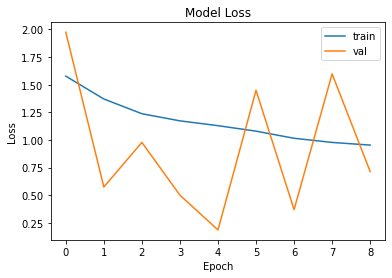

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'],loc='upper right')

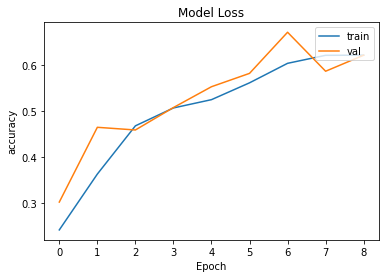

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='upper right')